In [4]:
import pcraster as pcr

# Specify the path to the mask.map file
mask_file_path = "D:/GDM Model-DISTRIBUTION PACK/GDM Model-DISTRIBUTION PACK/GDM Model/Inputs/mask.map"

# Read the mask.map file
mask_map = pcr.readmap(mask_file_path)



NameError: name 'mask' is not defined

In [5]:
import pcraster as pcr
import matplotlib.pyplot as plt

# Specify the path to the mask.map file
mask_file_path = "D:/GDM Model-DISTRIBUTION PACK/GDM Model-DISTRIBUTION PACK/GDM Model/Inputs/mask.map"

# Read the mask.map file
mask_map = pcr.readmap(mask_file_path)

# Visualize the mask map using PCRaster's plotting functions
plt.figure(figsize=(8, 6))
pcr.setclone(mask_map)
pcr.pcr2numpy(mask_map, mv=0)
pcr.plot(mask_map)
plt.title("Mask Map Visualization")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.colorbar(label="Mask Value")
plt.show()


TypeError: setclone(): incompatible function arguments. The following argument types are supported:
    1. (arg0: str) -> None
    2. (arg0: int, arg1: int, arg2: float, arg3: float, arg4: float) -> None

Invoked with: <pcraster._pcraster.Field object at 0x000001EEBE559770>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

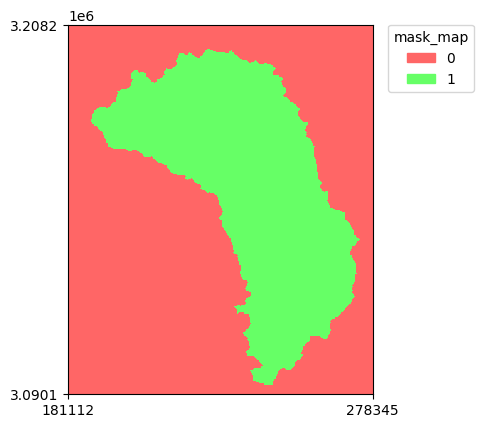

In [1]:
import pcraster as pcr
import matplotlib.pyplot as plt

# Specify the path to the mask.map file
mask_file_path = "D:/GDM Model-DISTRIBUTION PACK/GDM Model-DISTRIBUTION PACK/GDM Model/Inputs/mask.map"

# Read the mask.map file
mask_map = pcr.readmap(mask_file_path)

# Visualize the mask map using PCRaster's plotting functions
plt.figure(figsize=(8, 6))
pcr.plot(mask_map)
# plt.title("Mask Map Visualization")
# plt.xlabel("X Coordinate")
# plt.ylabel("Y Coordinate")
# plt.colorbar(label="Mask Value")
plt.show()


<Figure size 800x600 with 0 Axes>

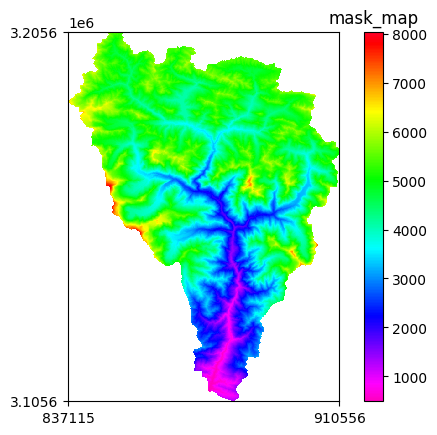

In [1]:
import pcraster as pcr
import matplotlib.pyplot as plt

# Specify the path to the mask.map file
mask_file_path = "D:/GDM Model-DISTRIBUTION PACK/GDM Model-DISTRIBUTION PACK/GDM Model/Inputs/dem.map"

# Read the mask.map file
mask_map = pcr.readmap(mask_file_path)

# Visualize the mask map using PCRaster's plotting functions
plt.figure(figsize=(8, 6))
pcr.plot(mask_map)
# plt.title("Mask Map Visualization")
# plt.xlabel("X Coordinate")
# plt.ylabel("Y Coordinate")
# plt.colorbar(label="Mask Value")
plt.show()

<Figure size 800x600 with 0 Axes>

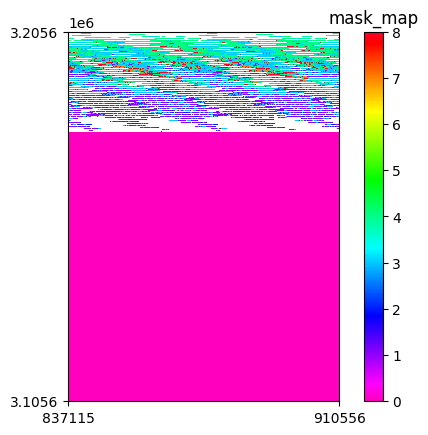

In [2]:
import pcraster as pcr
import matplotlib.pyplot as plt

# Specify the path to the mask.map file
mask_file_path = "D:/GDM Model-DISTRIBUTION PACK/GDM Model-DISTRIBUTION PACK\GDM Model/Inputs/lulc.map"
D:\GDM Model-DISTRIBUTION PACK\GDM Model-DISTRIBUTION PACK\GDM Model\Data Preprocessing\Observed Station Data\stationid.map
# Read the mask.map file
mask_map = pcr.readmap(mask_file_path)

# Visualize the mask map using PCRaster's plotting functions
plt.figure(figsize=(8, 6))
pcr.plot(mask_map)
# plt.title("Mask Map Visualization")
# plt.xlabel("X Coordinate")
# plt.ylabel("Y Coordinate")
# plt.colorbar(label="Mask Value")
plt.show()

In [4]:
import pcraster as pcr

# Specify the path to the LULC file (lulc.map)
lulc_file_path = "D:/GDM Model-DISTRIBUTION PACK/GDM Model-DISTRIBUTION PACK/GDM Model/Inputs/lulc.map"

# Read the LULC file
lulc_map = pcr.readmap(lulc_file_path)

# Create a PCRaster clone map based on the extent and resolution of the LULC map
pcr.setclone(lulc_map)

# Convert LULC values to a binary mask
# For example, you can create a mask where cells with specific land cover classes are set to 1 and all other cells are set to 0
# Define the land cover classes to include in the mask
included_classes = [1, 2, 3, 4, 5, 6, 7, 8]  # Example: land cover classes to include
mask_map = pcr.ifthen(pcr.isin(lulc_map, included_classes), pcr.scalar(1))

# Save the mask map as a PCRaster file
pcr.report(mask_map, "D:/GDM Model-DISTRIBUTION PACK/GDM Model-DISTRIBUTION PACK/GDM Model/Inputs/clone_mask.map")


TypeError: setclone(): incompatible function arguments. The following argument types are supported:
    1. (arg0: str) -> None
    2. (arg0: int, arg1: int, arg2: float, arg3: float, arg4: float) -> None

Invoked with: <pcraster._pcraster.Field object at 0x000001C312E0EDF0>

In [ ]:
import rasterio
import numpy as np
import pcraster as pcr

# Step 1: Load the GeoTIFF file
tiff_file = "D:/dem file ku/clippedcatchmentdem.tif"
with rasterio.open(tiff_file) as src:
    # Step 2: Get information from GeoTIFF
    xmin, ymin, xmax, ymax = src.bounds
    cell_size = src.res[0]
    rows, cols = src.shape
    crs = src.crs

    # Step 3: Create a Clone Map
    pcr.setclone(rows, cols, cell_size, xmin, ymin)

    # Step 4: Rasterize the GeoTIFF
    raster_data = src.read(1)  # Read the raster data
    # Perform any processing or thresholding as needed
    # For example, thresholding to create a binary mask
    threshold_value = 0  # Adjust as needed
    mask_raster = np.where(raster_data > threshold_value, 1, 0)

    # Step 5: Save the Raster Mask as a PCRaster File
    mask_map_file = "path/to/your/mask.map"
    pcr.report(pcr.numpy2pcr(pcr.PyArray, mask_raster, 0), mask_map_file)


In [5]:
# function of generating binary mask
def generate_mask(raster_path, shape_path, output_path, file_name):
    
    """Function that generates a binary mask from a vector file (shp or geojson)
    
    raster_path = path to the .tif;

    shape_path = path to the shapefile or GeoJson.

    output_path = Path to save the binary mask.

    file_name = Name of the file.
    
    """
    raster_path = "D:/dem file ku/clippedcatchmentdem.tif"

    shape_path = "D:/dem file ku/budhishape1.shp"

    output_path = "D:/dem file ku/mask.map"

    file_name = mask_map
    #load raster
    
    with rasterio.open(raster_path, "r") as src:
        raster_img = src.read()
        raster_meta = src.meta
    
    #load o shapefile ou GeoJson
    train_df = gpd.read_file(shape_path)
    
    #Verify crs
    if train_df.crs != src.crs:
        print(" Raster crs : {}, Vector crs : {}.\n Convert vector and raster to the same CRS.".format(src.crs,train_df.crs))
        
        
    #Function that generates the mask
    def poly_from_utm(polygon, transform):
        poly_pts = []

        poly = cascaded_union(polygon)
        for i in np.array(poly.exterior.coords):

            poly_pts.append(~transform * tuple(i))

        new_poly = Polygon(poly_pts)
        return new_poly
    
    
    poly_shp = []
    im_size = (src.meta['height'], src.meta['width'])
    for num, row in train_df.iterrows():
        if row['geometry'].geom_type == 'Polygon':
            poly = poly_from_utm(row['geometry'], src.meta['transform'])
            poly_shp.append(poly)
        else:
            for p in row['geometry']:
                poly = poly_from_utm(p, src.meta['transform'])
                poly_shp.append(poly)

    mask = rasterize(shapes=poly_shp,
                     out_shape=im_size)
    
    #Save
    mask = mask.astype("uint16")
    
    bin_mask_meta = src.meta.copy()
    bin_mask_meta.update({'count': 1})
    os.chdir(output_path)
    with rasterio.open(file_name, 'w', **bin_mask_meta) as dst:
        dst.write(mask * 255, 1)